# **MILESTONE 2: Descriptive Stats**

I have 5 assumptions to check. First I will import neccessary libraries. After that, I will get specific columns, modify data and generate plots for each task.

In [2]:
!pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df_athlete = pd.read_csv("/Users/khangnguyen/Desktop/Coursera/SQL/athlete_events.csv")
df_region = pd.read_csv("/Users/khangnguyen/Desktop/Coursera/SQL/noc_regions.csv")

### 1. Age of athletes
The age of athletes rose significantly in the period between 1920 and 1940

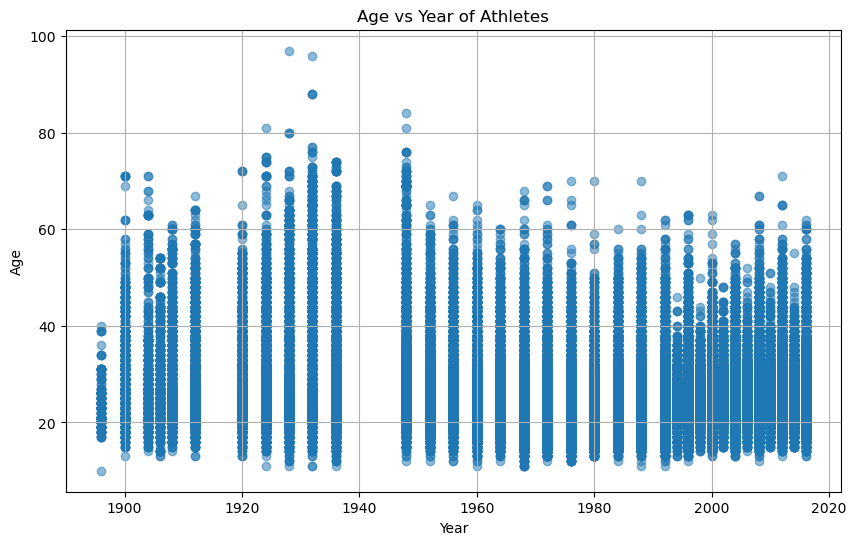

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(df_athlete['Year'], df_athlete['Age'], alpha=0.5)
plt.title('Age vs Year of Athletes')
plt.xlabel('Year')
plt.ylabel('Age')
plt.grid(True)
plt.show()

### 2. Country affects Medal
The United States leads with the highest number of gold, silver, and bronze medals, reflecting its comprehensive strength and long-standing Olympic tradition.
Following are the Soviet Union and European powerhouses like Germany, Great Britain, and France, maintaining high positions due to consistent performance and specialization in multiple Olympic sports.

**Some reasons for this could be:**
- Strong investment and facilities: Countries like the USA and Soviet Union provide excellent training, infrastructure, and funding, boosting medal chances.
- Sporting tradition: Long-established Olympic nations maintain high-quality teams and consistent performance.
- Team size: Larger delegations competing in more events raise the likelihood of winning medals.

In [5]:
country_df = df_athlete[['NOC', 'Medal']]
country_df

,NOC,Medal
0,CHN,NaN
1,CHN,NaN
2,DEN,NaN
3,DEN,Gold
4,NED,NaN
...,...,...
271111,POL,NaN
271112,POL,NaN
271113,POL,NaN
271114,POL,NaN


In [6]:
medal_table = pd.crosstab(index=country_df['NOC'], columns=country_df['Medal']).reset_index()
medal_table = medal_table[['NOC', 'Gold', 'Silver', 'Bronze']]
medal_table['Total'] = medal_table[['Gold', 'Silver', 'Bronze']].sum(axis=1).astype(int)
medal_table = medal_table.sort_values('Total', ascending=False)
medal_table.index.name = "Ranking"
medal_table = medal_table.reset_index(drop=True)
medal_table

Medal,NOC,Gold,Silver,Bronze,Total
0,USA,2638,1641,1358,5637
1,URS,1082,732,689,2503
2,GER,745,674,746,2165
3,GBR,678,739,651,2068
4,FRA,501,610,666,1777
...,...,...,...,...,...
144,SEN,0,1,0,1
145,TGA,0,1,0,1
146,ERI,0,0,1,1
147,CYP,0,1,0,1


### 3. Age affects Medal
- Young and middle-aged athletes (16–35 years old) have the highest medal-winning rates, especially those aged 26–30 (~16.6%), indicating this is the peak period for physical ability and skill.
- Athletes who are too young (<15) or older (>50) have low medal-winning rates, reflecting limitations in experience, endurance, and reflexes.
- Overall trend shows a bell-shaped relationship: the medal rate rises from adolescence, peaks around 26–30, and then gradually declines in older age groups.

In [7]:
medal_df = df_athlete[['Age','Medal']]
medal_df['Medal'] = medal_df['Medal'].notna().astype(int)
mean_age = df_athlete.groupby(['Sport', 'Sex'])['Age'].transform('mean')
medal_df['Age'] = medal_df['Age'].fillna(mean_age)

/var/folders/kq/852l1l2s3tx46rk1nzjrrwh80000gn/T/ipykernel_47241/3583266867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medal_df['Medal'] = medal_df['Medal'].notna().astype(int)
/var/folders/kq/852l1l2s3tx46rk1nzjrrwh80000gn/T/ipykernel_47241/3583266867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medal_df['Age'] = medal_df['Age'].fillna(mean_age)


In [8]:
bins = np.arange(6, medal_df['Age'].max() + 5, 5)
labels = [f"{i}-{i+4}" for i in bins[:-1]]

medal_df['Age_bin'] = pd.cut(medal_df['Age'], bins=bins, labels=labels, right=True)

medal_bin = medal_df.groupby('Age_bin')['Medal'].mean() * 100
age_counts = medal_df.groupby('Age_bin')['Medal'].count().reset_index().rename(columns={'Medal': 'Count'})

medal_bin = medal_bin.reset_index().rename(columns={'Medal': 'Percent_True'})
medal_bin = medal_bin.merge(age_counts, on='Age_bin')
medal_bin

/var/folders/kq/852l1l2s3tx46rk1nzjrrwh80000gn/T/ipykernel_47241/3887102977.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medal_df['Age_bin'] = pd.cut(medal_df['Age'], bins=bins, labels=labels, right=True)
/var/folders/kq/852l1l2s3tx46rk1nzjrrwh80000gn/T/ipykernel_47241/3887102977.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medal_bin = medal_df.groupby('Age_bin')['Medal'].mean() * 100
/var/folders/kq/852l1l2s3tx46rk1nzjrrwh80000gn/T/ipykernel_47241/3887102977.py:7: FutureWarning: The default of observed=False is deprecated and will be changed t

,Age_bin,Percent_True,Count
0,6.0-10.0,14.285714,14
1,11.0-15.0,9.033436,7118
2,16.0-20.0,12.476579,59776
3,21.0-25.0,15.133484,108065
4,26.0-30.0,16.636417,60055
5,31.0-35.0,15.603098,21688
6,36.0-40.0,14.879619,7144
7,41.0-45.0,14.368989,3431
8,46.0-50.0,10.263789,2085
9,51.0-55.0,13.539192,842


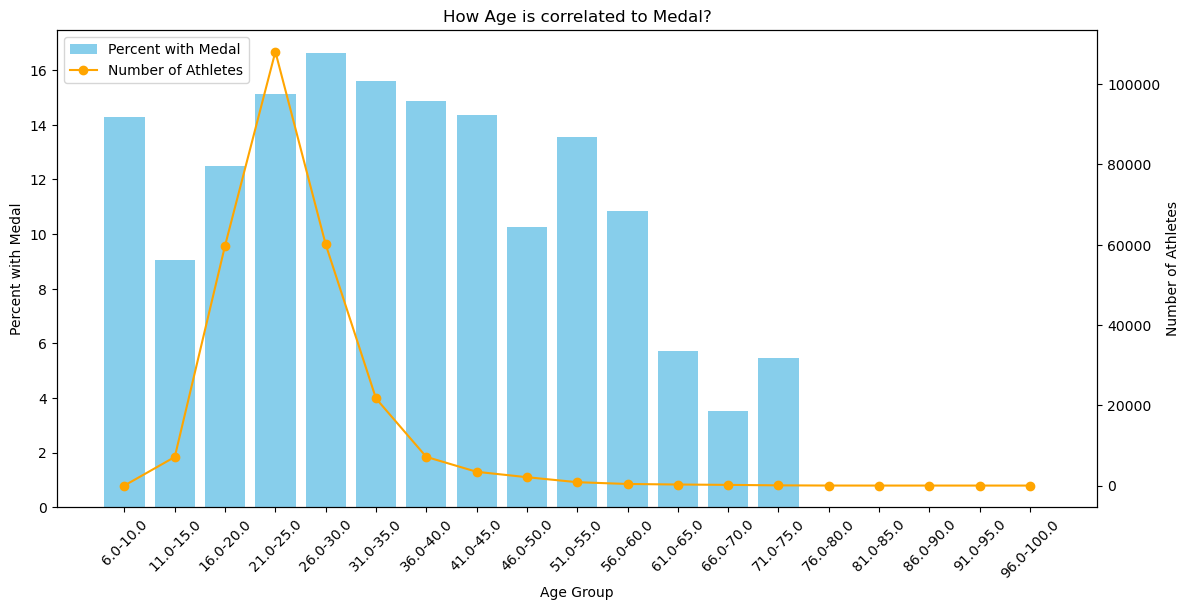

In [9]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,6))

bars = ax1.bar(medal_bin['Age_bin'], medal_bin['Percent_True'], color='skyblue', label='Percent with Medal')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Percent with Medal', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(range(len(medal_bin['Age_bin'])))
ax1.set_xticklabels(medal_bin['Age_bin'], rotation=45)

ax2 = ax1.twinx()
line = ax2.plot(medal_bin['Age_bin'], medal_bin['Count'], color='orange', marker='o', label='Number of Athletes')
ax2.set_ylabel('Number of Athletes', color='black')
ax2.tick_params(axis='y', labelcolor='black')

fig.tight_layout()
plt.title('How Age is correlated to Medal?')

lines_labels = [bars, line[0]]
labels = [l.get_label() for l in lines_labels]
ax1.legend(lines_labels, labels, loc='upper left')

plt.show()


### 4. Height affects medal
- Athletes between 1.70 m and 1.96 m show the highest medal-winning rates, with a clear peak from 1.76 m to 1.86 m, where both participation and success rate are high.
- Taller athletes (1.96 m–2.26 m) may still have high success rates, but their small numbers make this less significant.
- This pattern likely reflects the combination of optimal physical proportions for most sports and a larger talent pool within the common height range.

In [10]:
medal_height_df = df_athlete[['Height', 'Medal']]
medal_height_df['Medal'] = medal_height_df['Medal'].notna().astype(int)
mean_height = df_athlete.groupby(['Sport', 'NOC', 'Sex'])['Height'].transform('mean')
medal_height_df['Height'] = medal_height_df['Height'].fillna(mean_height)

mean_height = df_athlete.groupby(['Sport', 'NOC'])['Height'].transform('mean')
medal_height_df['Height'] = medal_height_df['Height'].fillna(mean_height)

mean_height = df_athlete.groupby(['NOC'])['Height'].transform('mean')
medal_height_df['Height'] = medal_height_df['Height'].fillna(mean_height)

mean_height = df_athlete['Height'].mean()
medal_height_df['Height'] = medal_height_df['Height'].fillna(mean_height)

/var/folders/kq/852l1l2s3tx46rk1nzjrrwh80000gn/T/ipykernel_47241/2729128881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medal_height_df['Medal'] = medal_height_df['Medal'].notna().astype(int)
/var/folders/kq/852l1l2s3tx46rk1nzjrrwh80000gn/T/ipykernel_47241/2729128881.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medal_height_df['Height'] = medal_height_df['Height'].fillna(mean_height)
/var/folders/kq/852l1l2s3tx46rk1nzjrrwh80000gn/T/ipykernel_47241/2729128881.py:7: SettingWithCopyWarning: 
A v

In [11]:
bins = list(range(126, 221, 5)) + [226]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

medal_height_df['Height_bin'] = pd.cut(medal_height_df['Height'], bins=bins, labels=labels, right=True)
medal_height_bin = medal_height_df.groupby('Height_bin')['Medal'].mean() * 100
height_counts = medal_height_df.groupby('Height_bin')['Medal'].count().reset_index().rename(columns={'Medal': 'Count'})
medal_height_bin = medal_height_bin.reset_index().rename(columns={'Medal': 'Percent_True'})
medal_height_bin = medal_height_bin.merge(height_counts, on='Height_bin')

medal_height_bin

/var/folders/kq/852l1l2s3tx46rk1nzjrrwh80000gn/T/ipykernel_47241/2355881019.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medal_height_df['Height_bin'] = pd.cut(medal_height_df['Height'], bins=bins, labels=labels, right=True)
/var/folders/kq/852l1l2s3tx46rk1nzjrrwh80000gn/T/ipykernel_47241/2355881019.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medal_height_bin = medal_height_df.groupby('Height_bin')['Medal'].mean() * 100
/var/folders/kq/852l1l2s3tx46rk1nzjrrwh80000gn/T/ipykernel_47241/2355881019.py:6: FutureWarning: The default of observed=Fals

,Height_bin,Percent_True,Count
0,126-131,0.000000,12
1,131-136,8.771930,57
2,136-141,9.941520,171
3,141-146,12.540193,622
4,146-151,9.393774,1831
5,151-156,9.592188,5223
6,156-161,11.590023,12830
7,161-166,11.305014,24812
8,166-171,11.560589,44150
9,171-176,14.049018,50879


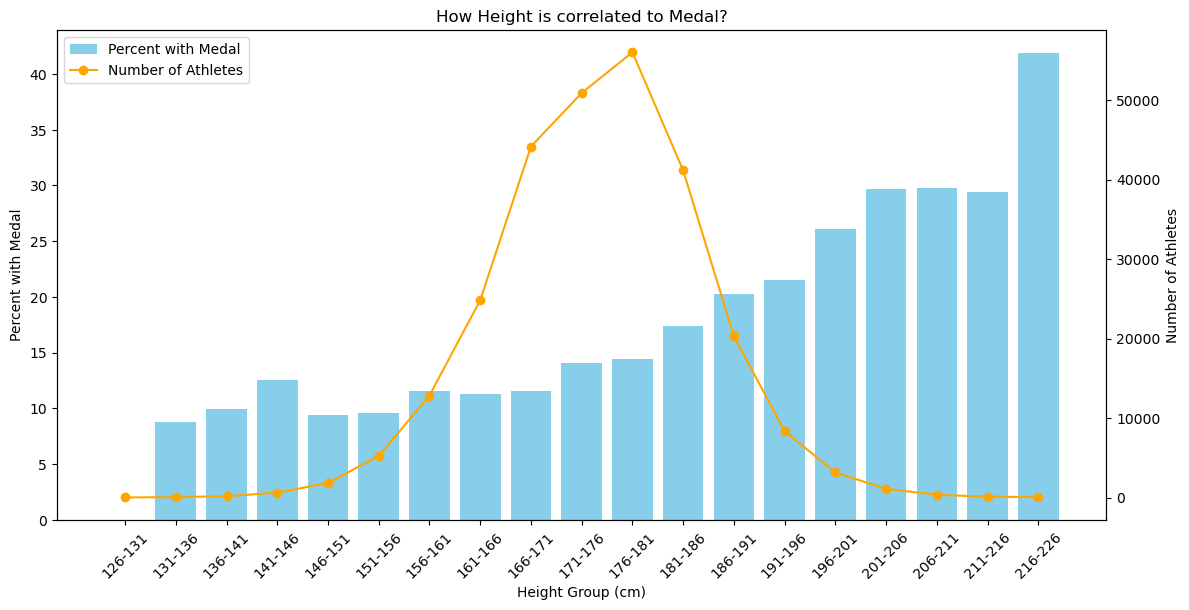

In [12]:
fig, ax1 = plt.subplots(figsize=(12,6))

bars = ax1.bar(medal_height_bin['Height_bin'], medal_height_bin['Percent_True'], color='skyblue', label='Percent with Medal')
ax1.set_xlabel('Height Group (cm)')
ax1.set_ylabel('Percent with Medal', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(range(len(medal_height_bin['Height_bin'])))
ax1.set_xticklabels(medal_height_bin['Height_bin'], rotation=45)

ax2 = ax1.twinx()
line = ax2.plot(medal_height_bin['Height_bin'], medal_height_bin['Count'], color='orange', marker='o', label='Number of Athletes')
ax2.set_ylabel('Number of Athletes', color='black')
ax2.tick_params(axis='y', labelcolor='black')

fig.tight_layout()
plt.title('How Height is correlated to Medal?')

lines_labels = [bars, line[0]]
labels = [l.get_label() for l in lines_labels]
ax1.legend(lines_labels, labels, loc='upper left')

plt.show()

### 5. Weight affects Medal
- Athletes weighing 55–90 kg show the most reliable medal-winning rates, peaking around 80–90 kg (~19–23%), where both participation and success rate are high.
- Lighter athletes (<55 kg) have lower medal rates (~9–12%) despite large numbers, likely reflecting physical limitations in strength or size for many sports.
- Heavier athletes (≥95 kg) may have high success rates, but their small sample size makes these results less meaningful, so the main trend focuses on the well-populated middle range.

In [13]:
medal_weight_df = df_athlete[['Weight', 'Medal']].copy()
medal_weight_df['Medal'] = medal_weight_df['Medal'].notna().astype(int)

In [14]:
mean_weight = df_athlete.groupby(['Sport', 'NOC', 'Sex'])['Weight'].transform('mean')
medal_weight_df['Weight'] = medal_weight_df['Weight'].fillna(mean_weight)

mean_weight = df_athlete.groupby(['Sport', 'NOC'])['Weight'].transform('mean')
medal_weight_df['Weight'] = medal_weight_df['Weight'].fillna(mean_weight)

mean_weight = df_athlete.groupby(['NOC'])['Weight'].transform('mean')
medal_weight_df['Weight'] = medal_weight_df['Weight'].fillna(mean_weight)

mean_weight = df_athlete['Weight'].mean()
medal_weight_df['Weight'] = medal_weight_df['Weight'].fillna(mean_weight)

In [15]:
bins = list(range(35, 136, 5)) + [140]  # điều chỉnh theo dữ liệu
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
medal_weight_df['Weight_bin'] = pd.cut(medal_weight_df['Weight'], bins=bins, labels=labels, right=True)

medal_weight_bin = medal_weight_df.groupby('Weight_bin')['Medal'].mean() * 100
weight_counts = medal_weight_df.groupby('Weight_bin')['Medal'].count().reset_index().rename(columns={'Medal': 'Count'})
medal_weight_bin = medal_weight_bin.reset_index().rename(columns={'Medal': 'Percent_True'})
medal_weight_bin = medal_weight_bin.merge(weight_counts, on='Weight_bin')

medal_weight_bin

/var/folders/kq/852l1l2s3tx46rk1nzjrrwh80000gn/T/ipykernel_47241/864643728.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medal_weight_bin = medal_weight_df.groupby('Weight_bin')['Medal'].mean() * 100
/var/folders/kq/852l1l2s3tx46rk1nzjrrwh80000gn/T/ipykernel_47241/864643728.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weight_counts = medal_weight_df.groupby('Weight_bin')['Medal'].count().reset_index().rename(columns={'Medal': 'Count'})


,Weight_bin,Percent_True,Count
0,35-40,9.720972,1111
1,40-45,10.871303,2502
2,45-50,10.451717,8678
3,50-55,10.888078,16440
4,55-60,11.843694,28150
5,60-65,12.165790,36504
6,65-70,13.207207,38797
7,70-75,13.777849,43403
8,75-80,16.018810,39129
9,80-85,19.519433,24263


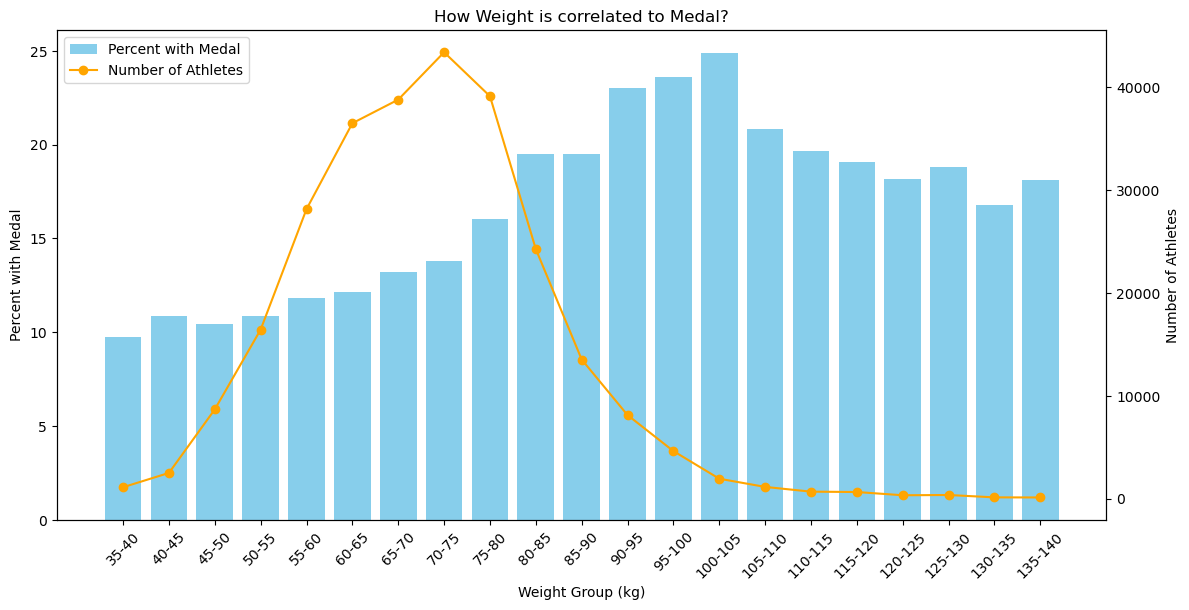

In [16]:
fig, ax1 = plt.subplots(figsize=(12,6))

bars = ax1.bar(medal_weight_bin['Weight_bin'], medal_weight_bin['Percent_True'], color='skyblue', label='Percent with Medal')
ax1.set_xlabel('Weight Group (kg)')
ax1.set_ylabel('Percent with Medal', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(range(len(medal_weight_bin['Weight_bin'])))
ax1.set_xticklabels(medal_weight_bin['Weight_bin'], rotation=45)

ax2 = ax1.twinx()
line = ax2.plot(medal_weight_bin['Weight_bin'], medal_weight_bin['Count'], color='orange', marker='o', label='Number of Athletes')
ax2.set_ylabel('Number of Athletes', color='black')
ax2.tick_params(axis='y', labelcolor='black')

fig.tight_layout()
plt.title('How Weight is correlated to Medal?')

lines_labels = [bars, line[0]]
labels = [l.get_label() for l in lines_labels]
ax1.legend(lines_labels, labels, loc='upper left')

plt.show()